In [2]:
from IPython.display import HTML, Javascript, display

## SOURCE: https://stackoverflow.com/questions/54886701/how-to-code-restart-kernel-and-run-all-in-button-for-python-jupyter-notebook
## This is meant to fulfil the "runme"-requirement script that is specified in the instructions

def initialize():
    display(HTML(
        '''
            <script>
                code_show = false;
                function restart_run_all(){
                    IPython.notebook.kernel.restart();
                    setTimeout(function(){
                        IPython.notebook.execute_all_cells();
                    }, 5000)
                }
                function code_toggle() {
                    if (code_show) {
                        $('div.input').hide(200);
                    } else {
                        $('div.input').show(200);
                    }
                    code_show = !code_show
                }
            </script>
            <button onclick="code_toggle()">Click to toggle</button>
            <button onclick="restart_run_all()">Click to Restart and Run all Cells</button>
        '''
    ))
initialize()


In [1]:
from scipy.stats import truncnorm, multivariate_normal, norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def m_n(Sn, S0, m0, var, X, y):
    return Sn @ ( np.add(S0.I @ m0, 1/var * X.T * y) )

In [4]:
def s_n(S0, var, X):
    return ( np.add(S0.I, 1/var * X.T @ X) ).I

In [5]:
# Testing if functions m_n and s_n gives same values as in Q3  

mu_1 = 1
mu_2 = -1
var_1 = 1
var_2 = 4
var_t = 5
t = 3

m0 = np.array([[mu_1], 
               [mu_2]])

S0 = np.matrix( [[var_1, 0], 
                 [0, var_2]] )

X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)

mn = m_n(Sn, S0, m0, var_t, X, t)

print(Sn)
print(mn)


[[0.9 0.4]
 [0.4 2.4]]
[[ 1.1]
 [-1.4]]


# Q4

In [6]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [7]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 10#mu_1
s2_0 = -10#mu_2

In [8]:
#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(mu_1 - mu_2)/np.sqrt(var_t), b=np.inf, loc=(mu_1 - mu_2), scale=np.sqrt(var_t))

In [9]:


L = 50000
T = np.zeros(L)
S1 = np.zeros(L)
S2 = np.zeros(L)

T[0] = t0
S1[0] = s1_0
S2[0] = s2_0
m0 = np.array([[mu_1, mu_2]]).T
S0 = np.matrix( [[var_1, 0], [0, var_2]] )
X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)

for i in range(1, L):
    # p(t_k+1 | s1_k, s2_k, y = 1)
    mu_t = S1[i - 1] - S2[i - 1]
    T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))
    
    #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
    mn = m_n(Sn, S0, m0, var_t, X, T[i])
    samples = multivariate_normal.rvs(np.ravel(mn), Sn)
    S1[i] = samples[0]
    S2[i] = samples[1]
    
    

(array([4.38688870e-01, 3.19393773e-01, 1.72088131e-01, 6.80752288e-02,
        1.83672361e-02, 4.08614819e-03, 7.15075933e-04, 6.12922228e-05,
        0.00000000e+00, 0.00000000e+00, 2.04307409e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.04307409e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.04307409e-05]),
 array([3.52039432e-05, 9.78952222e-01, 1.95786924e+00, 2.93678626e+00,
        3.91570327e+00, 4.89462029e+00, 5.87353731e+00, 6.85245433e+00,
        7.83137135e+00, 8.81028836e+00, 9.78920538e+00, 1.07681224e+01,
        1.17470394e+01, 1.27259564e+01, 1.37048735e+01, 1.46837905e+01,
        1.56627075e+01, 1.66416245e+01, 1.76205415e+01, 1.85994585e+01,
        1.95783756e+01]),
 <a list of 20 Patch objects>)

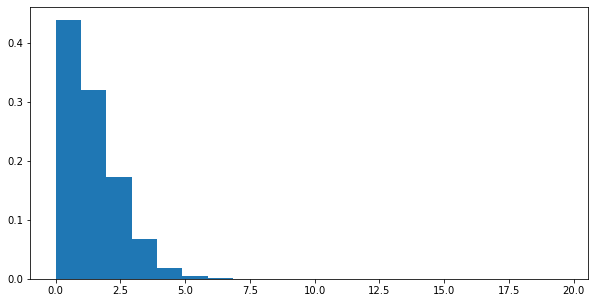

In [10]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(T, density=True, bins=20)

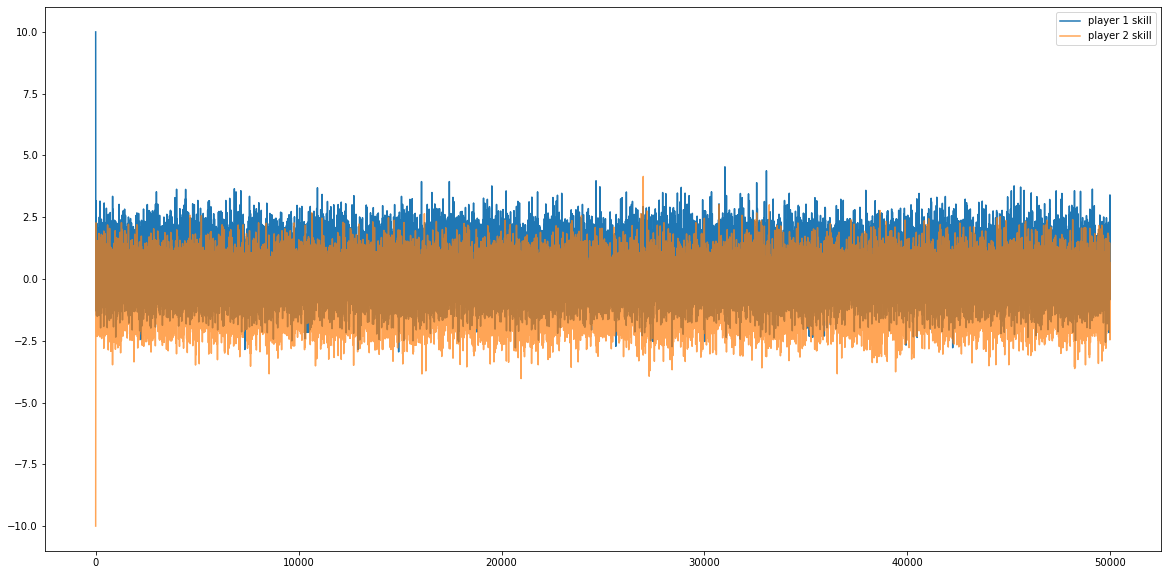

In [11]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.show()

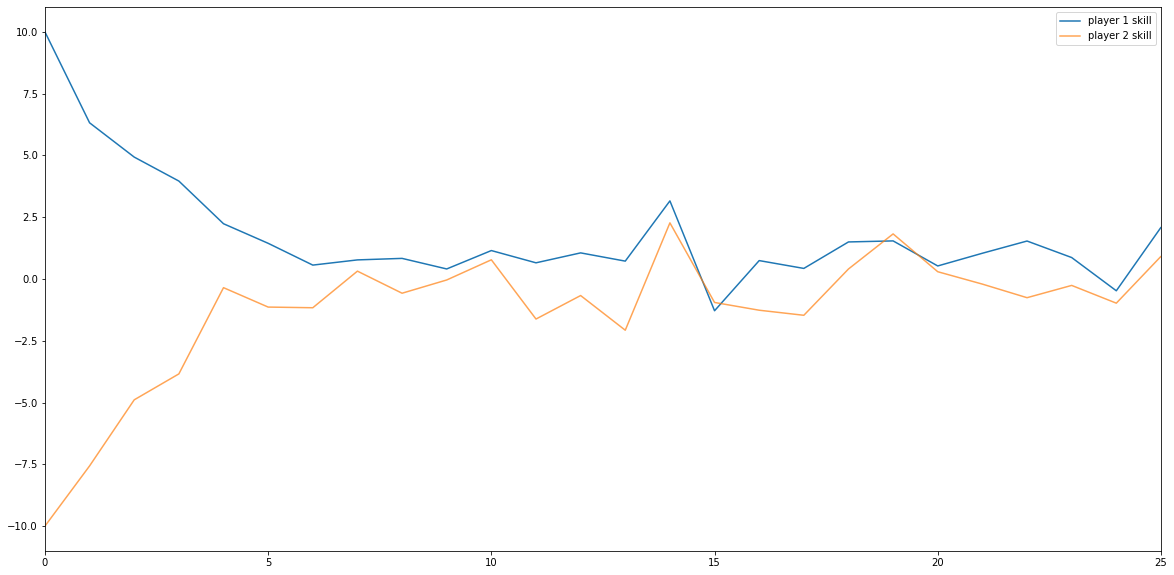

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.xlim(0, 25)
plt.show()

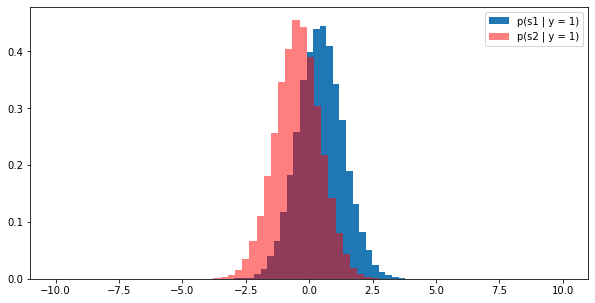

In [13]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(S1, density=True, bins = 50, label="p(s1 | y = 1)")
plt.hist(S2, density=True, bins = 50, label="p(s2 | y = 1)", fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

In [14]:
print(f'est mean S1: {np.mean(S1)}\nest mean S2: {np.mean(S2)}\nest var S1: {np.var(S1)}\nest var S2: {np.var(S2)}')

est mean S1: 0.45646210362918055
est mean S2: -0.45917806468049416
est var S1: 0.7976395091729882
est var S2: 0.7898973960408449


The initial values
<br>
s1_0 = 10 
<br>
s2_0 = -10
<br>
<br>
Generates a burn in period of about 5-6 iterations. A better choice of initial values is to choose the mean of the sampled data points for each player.
<br>
s1_0 = 0.47
<br>
s2_0 = -0.47

## Rerun with new params

In [15]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [16]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 0.47
s2_0 = -0.47

#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(s1_0 - s2_0)/np.sqrt(var_t), b=np.inf, loc=(s1_0 - s2_0), scale=np.sqrt(var_t))

In [17]:


L = 50000
T = np.zeros(L)
S1 = np.zeros(L)
S2 = np.zeros(L)

T[0] = t0
S1[0] = s1_0
S2[0] = s2_0
m0 = np.array([[mu_1],
               [mu_2]])

S0 = np.matrix( [[var_1, 0], 
                 [0, var_2]] )

X = np.array([[1, -1]])

Sn = s_n(S0, var_t, X)


for i in range(1, L):
    # p(t_k+1 | s1_k, s2_k, y = 1)
    mu_t = S1[i - 1] - S2[i - 1]
    T[i] = truncnorm.rvs(a=-mu_t/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))
    
    #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
    mn = m_n(Sn, S0, m0, var_t, X, T[i])
    samples = multivariate_normal.rvs(np.ravel(mn), Sn)
    S1[i] = samples[0]
    S2[i] = samples[1]
    
    
    

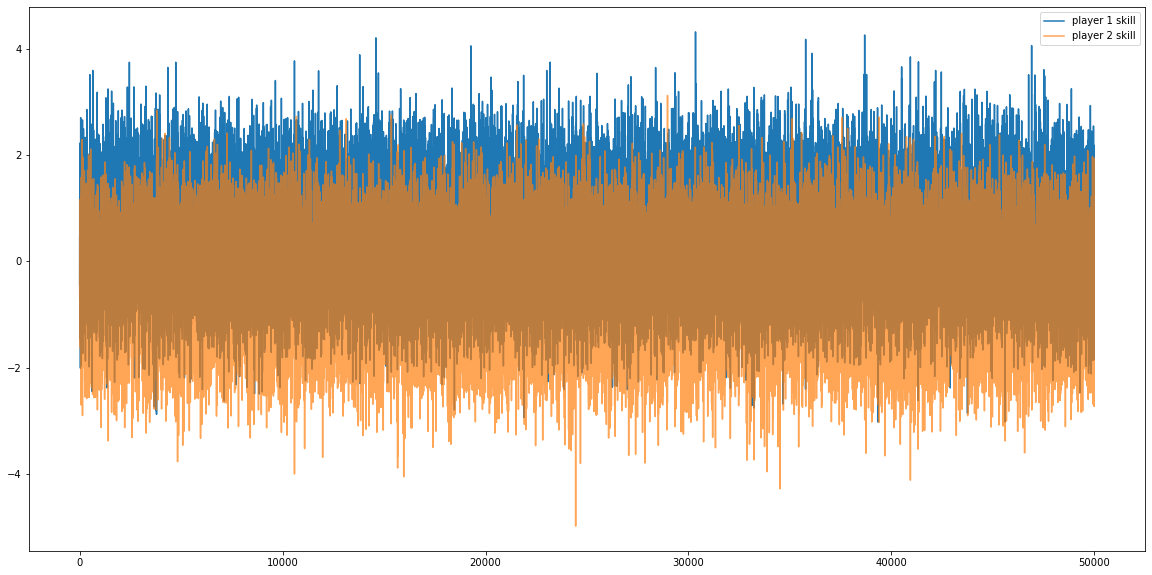

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.show()

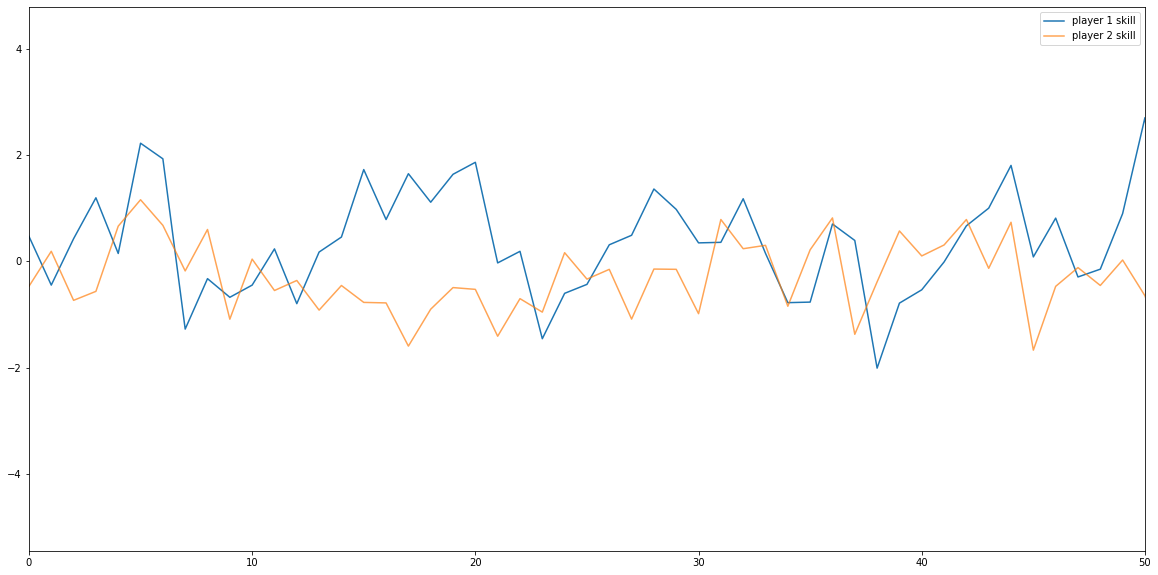

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S1, label="player 1 skill")
plt.plot(S2, label="player 2 skill", alpha=0.7)
plt.legend(loc='best')
plt.xlim(0, 50)
plt.show()

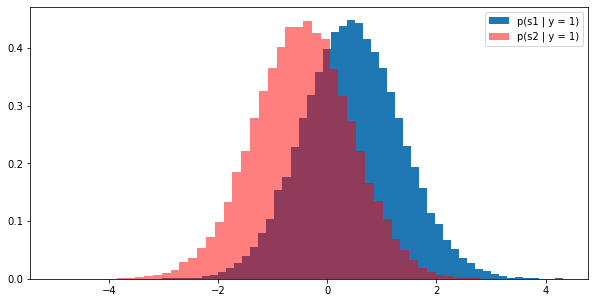

In [20]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(S1, density=True, bins = 50, label="p(s1 | y = 1)")
plt.hist(S2, density=True, bins = 50, label="p(s2 | y = 1)", fc=(1, 0, 0, 0.5))
plt.legend()
plt.show()

In [21]:
print(f'est mean S1: {np.mean(S1)}\nest mean S2: {np.mean(S2)}\nest var S1: {np.var(S1)}\nest var S2: {np.var(S2)}')

est mean S1: 0.45537280353205023
est mean S2: -0.45988281454657326
est var S1: 0.7954088746298911
est var S2: 0.7948817192651306


In [22]:
def gauss_approx(data1, data2):
    S0 = np.cov(data1, data2)
    m0 = [np.mean(data1), np.mean(data2)]
    return m0, S0

In [23]:
def normal_pdf(x, mean, var):
    return ( 1 / np.sqrt(2 * np.pi * var) ) * np.exp( ( -1 / ( 2 * var ) ) * ( (x - mean) **2 ) )

In [24]:
est_mean, est_cov = gauss_approx(S1, S2)
print(est_mean)
print(est_cov)

[0.45537280353205023, -0.45988281454657326]
[[0.79542478 0.21861663]
 [0.21861663 0.79489762]]


# Testing different sample sizes

In [25]:
import time

In [26]:
#hyperparameters
mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1

In [27]:
#Initiate s_1 and s_2 as their expected means
s1_0 = 0.47
s2_0 = -0.47

#Initiate t for y = 1 (unnecessary, but keeps len(T) = len(S1) = len(S2))
t0 = truncnorm.rvs(a=-(s1_0 - s2_0)/np.sqrt(var_t), b=np.inf, loc=(s1_0 - s2_0), scale=np.sqrt(var_t))

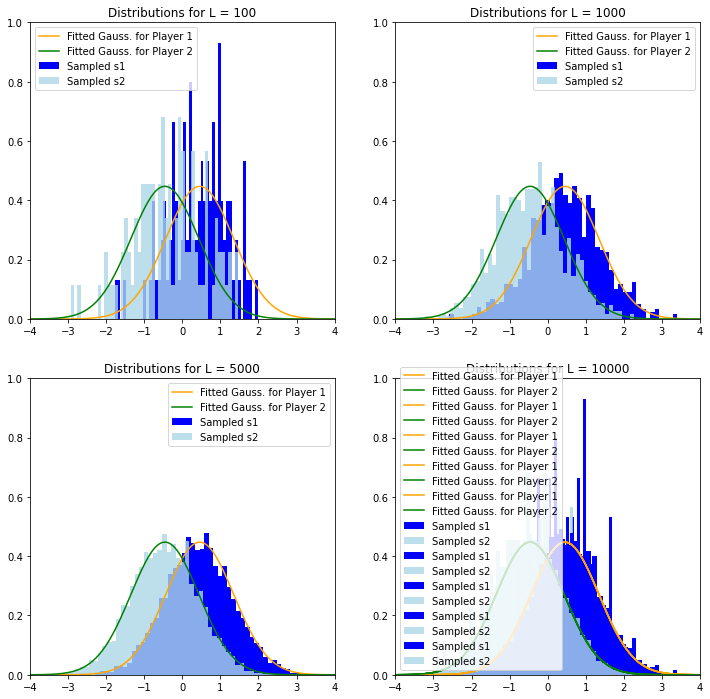

In [28]:
lengths = [100, 1000,5000, 10000]
times = []

fig, axes = plt.subplots(2,2, figsize=(12,12))
j = 0
for i, L in enumerate(lengths):
    start = time.time()
    T = np.zeros(L)
    S1 = np.zeros(L)
    S2 = np.zeros(L)

    T[0] = t0
    S1[0] = s1_0
    S2[0] = s2_0
    m0 = np.array([[mu_1], 
                   [mu_2]])
    
    S0 = np.matrix( [[var_1, 0],
                     [0, var_2]] )
    
    X = np.array([[1, -1]])

    Sn = s_n(S0, var_t, X)


    for j in range(1, L):
        # p(t_k+1 | s1_k, s2_k, y = 1)
        mu_t = S1[j - 1] - S2[j - 1]
        T[j] = truncnorm.rvs(a=(0 - mu_t)/np.sqrt(var_t), b=np.inf, loc=mu_t, scale=np.sqrt(var_t))

        #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
        mn = m_n(Sn, S0, m0, var_t, X, T[j])
        samples = multivariate_normal.rvs(np.ravel(mn), Sn)
        S1[j] = samples[0]
        S2[j] = samples[1]
    
    times.append(time.time() - start)
    xv = np.linspace( -4 , 4 ,200)
    
    if (i == 0):
        j = 0
        k = 0
    elif (i == 1):
        j = 0
        k = 1
    elif (i == 2):
        j = 1
        k = 0
    else:
        j = 1
        k = 1
        
        
    plt.plot(xv ,normal_pdf(xv, est_mean[0], est_cov[0, 0]), label="Fitted Gauss. for Player 1", color="orange")
    plt.hist(S1, density=True, bins=50, label="Sampled s1", color="blue")
    plt.plot(xv ,normal_pdf(xv, est_mean[1], est_cov[1, 1]), label="Fitted Gauss. for Player 2", color="green")
    plt.hist(S2, density=True, bins=50, label="Sampled s2", color="lightblue", alpha=0.8)
    axes[j][k].plot(xv ,normal_pdf(xv, est_mean[0], est_cov[0, 0]), label="Fitted Gauss. for Player 1", color="orange")
    axes[j][k].hist(S1, density=True, bins=50, label="Sampled s1", color="blue")
    
    axes[j][k].plot(xv ,normal_pdf(xv, est_mean[1], est_cov[1, 1]), label="Fitted Gauss. for Player 2", color="green")
    axes[j][k].hist(S2, density=True, bins=50, label="Sampled s2", color="lightblue", alpha=0.8)
    
    axes[j][k].set_title(f'Distributions for L = {L}')
    axes[j][k].legend(loc="best")
    axes[j][k].set_xlim(-4, 4)
    axes[j][k].set_ylim(0, 1)
   #  axes[j][k].text(-4,0.7, f"|'true_mean_s1' - sample_mean_s1| = {np.abs(est_mean[0] - np.mean(S1))} \
   #                     \n|'true_var_s1' - sample_var_s1| = {np.abs(est_cov[0, 0] - np.var(S1))} \
   #                     \n|'true_mean_s2' - sample_mean_s2| = {np.abs(est_mean[1] - np.mean(S2))} \
   #                     \n|'true_var_s2' - sample_var_s2| = {np.abs(est_cov[1, 1] - np.var(S2))}")
fig.savefig('plots_gibbs.png')

In [29]:
times

[0.06009244918823242, 0.573206901550293, 2.8565475940704346, 5.714925527572632]

Text(0, 0.5, 'Time (s)')

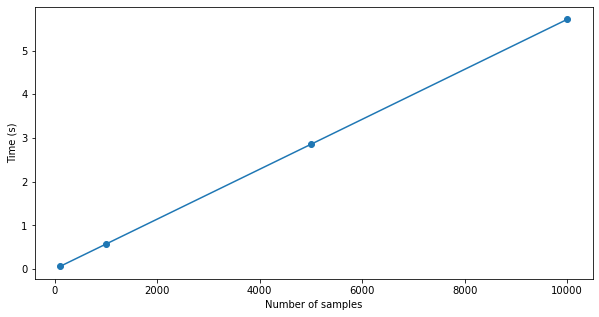

In [30]:
plt.plot(lengths, times, marker = 'o')
plt.xlabel("Number of samples")
plt.ylabel("Time (s)")

We can see that we don't get much in terms of approximating the mean & variance going further than 5000 data points. 1000 samples might even be enough.

p(s_1) = N(0, 1)
p(s_1 | y = 1) = N(0.47, 0.58)
<br>
p(s_2) = N(0, 1)
p(s_2 | y = 1) = N(-0.47, 0.58)
<br>
<br>
In the light of new data, i.e. that player 1 won, we are now more sure that player 1 has a positive skill level since the mean has increased and the variance has shrinked.
<br>
<br>
The same is true for player 2, but in reverse. Now that we know that player 2 lost, we are a little bit more sure that player 2 has a negative skill level

# Q5

In [31]:
import pandas as pd

In [32]:
def reset_teams_dict(df):
    teams_df = df[['team1', 'team2']].values.ravel()
    teams_df = pd.unique(teams_df)
    return {t : (25, (25/3)**2) for t in teams_df}

In [33]:
series_df = pd.read_csv('SerieA.csv')
series_df.count()

yyyy-mm-dd    380
HH:MM         380
team1         380
team2         380
score1        380
score2        380
dtype: int64

In [34]:
series_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2
0,2018-08-18,18:00,Chievo,Juventus,2,3
1,2018-08-18,20:30,Lazio,Napoli,1,2
2,2018-08-19,18:00,Torino,Roma,0,1
3,2018-08-19,20:30,Sassuolo,Inter,1,0
4,2018-08-19,20:30,Parma,Udinese,2,2


In [35]:
series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
yyyy-mm-dd    380 non-null object
HH:MM         380 non-null object
team1         380 non-null object
team2         380 non-null object
score1        380 non-null int64
score2        380 non-null int64
dtypes: int64(2), object(4)
memory usage: 17.9+ KB


In [36]:
no_ties_df = series_df.loc[series_df['score1'] != series_df['score2']]
no_ties_df.count()

yyyy-mm-dd    272
HH:MM         272
team1         272
team2         272
score1        272
score2        272
dtype: int64

In [37]:
no_ties_df['result'] = no_ties_df.apply(lambda row: 1 if row.score1 > row.score2 else -1, axis=1)

<ipython-input-37-4755747e9109>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_ties_df['result'] = no_ties_df.apply(lambda row: 1 if row.score1 > row.score2 else -1, axis=1)


In [38]:
no_ties_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1
1,2018-08-18,20:30,Lazio,Napoli,1,2,-1
2,2018-08-19,18:00,Torino,Roma,0,1,-1
3,2018-08-19,20:30,Sassuolo,Inter,1,0,1
5,2018-08-19,20:30,Empoli,Cagliari,2,0,1


In [39]:
teams_dict = reset_teams_dict(no_ties_df)
teams_dict

{'Chievo': (25, 69.44444444444446),
 'Juventus': (25, 69.44444444444446),
 'Lazio': (25, 69.44444444444446),
 'Napoli': (25, 69.44444444444446),
 'Torino': (25, 69.44444444444446),
 'Roma': (25, 69.44444444444446),
 'Sassuolo': (25, 69.44444444444446),
 'Inter': (25, 69.44444444444446),
 'Empoli': (25, 69.44444444444446),
 'Cagliari': (25, 69.44444444444446),
 'Bologna': (25, 69.44444444444446),
 'Spal': (25, 69.44444444444446),
 'Atalanta': (25, 69.44444444444446),
 'Frosinone': (25, 69.44444444444446),
 'Milan': (25, 69.44444444444446),
 'Parma': (25, 69.44444444444446),
 'Udinese': (25, 69.44444444444446),
 'Sampdoria': (25, 69.44444444444446),
 'Genoa': (25, 69.44444444444446),
 'Fiorentina': (25, 69.44444444444446)}

In [40]:
def gibbs_sample_one_game(mu_1, var_1, mu_2, var_2, y, iterations):
    # TODO: handle burn in
    var_t = (25/6)**2
    std_t = np.sqrt(var_t)
    
    T = np.zeros(iterations)
    S1 = np.zeros(iterations)
    S2 = np.zeros(iterations)

    T[0] = 0 #TODO: what should we use here?
    S1[0] = mu_1
    S2[0] = mu_2
    m0 = np.array([[mu_1], 
                   [mu_2]])
    
    S0 = np.matrix( [[var_1, 0],
                     [0, var_2]] )
    
    X = np.array([[1, -1]])

    Sn = s_n(S0, var_t, X)

    for i in range(1, iterations):
        # p(t_k+1 | s1_k, s2_k, y)
        mu_t = S1[i - 1] - S2[i - 1]
        
        lower, upper = (0, np.inf) if y==1 else (-np.inf, 0)
            
        T[i] = truncnorm.rvs(a=(lower - mu_t)/std_t, 
                             b=(upper - mu_t)/std_t, 
                             loc=mu_t, 
                             scale=std_t)
        
        #p(s1_k+1, s2_k+1 | t_k+1, y = 1)
        mn = m_n(Sn, S0, m0, var_t, X, T[i])
        samples = multivariate_normal.rvs(np.ravel(mn), Sn)
        S1[i] = samples[0]
        S2[i] = samples[1]
    
    #Remove first element since these are set by us
    return gauss_approx(S1[1:], S2[1:])

In [41]:
def ADF(df, teams_dict):
    for i, row in df.iterrows():
        team_1 = row['team1']
        team_2 = row['team2']
        print('-'*10)
        print(f'{team_1}: ({teams_dict[team_1][0]:.2f}, {teams_dict[team_1][1]:.2f} ), {team_2}: ({teams_dict[team_2][0]:.2f}, {teams_dict[team_2][1]:.2f} )')
        expected_winner = row['team1'] if teams_dict[team_1][0] - teams_dict[team_2][0] > 0 else row['team2']
        actual_winner = row['team1'] if row['result'] == 1 else row['team2']
        print(f'expected_winner: {expected_winner}, actual winner: {actual_winner}')

        new_mu, new_cov = gibbs_sample_one_game(teams_dict[team_1][0], 
                                                teams_dict[team_1][1],
                                                teams_dict[team_2][0], 
                                                teams_dict[team_2][1],
                                                row['result'], 
                                                1000)

        teams_dict[team_1] = (new_mu[0], new_cov[0, 0])
        teams_dict[team_2] = (new_mu[1], new_cov[1, 1])
        print(f'{team_1}: ({teams_dict[team_1][0]:.2f}, {teams_dict[team_1][1]:.2f} ), {team_2}: ({teams_dict[team_2][0]:.2f}, {teams_dict[team_2][1]:.2f} )')
        print('-'*10)
    return teams_dict
    

In [42]:
teams_dict_updated = ADF(no_ties_df, teams_dict)

----------
Chievo: (25.00, 69.44 ), Juventus: (25.00, 69.44 )
expected_winner: Juventus, actual winner: Juventus
Chievo: (20.04, 49.85 ), Juventus: (29.73, 52.48 )
----------
----------
Lazio: (25.00, 69.44 ), Napoli: (25.00, 69.44 )
expected_winner: Napoli, actual winner: Napoli
Lazio: (20.51, 48.17 ), Napoli: (29.23, 48.94 )
----------
----------
Torino: (25.00, 69.44 ), Roma: (25.00, 69.44 )
expected_winner: Roma, actual winner: Roma
Torino: (21.12, 49.57 ), Roma: (29.26, 45.03 )
----------
----------
Sassuolo: (25.00, 69.44 ), Inter: (25.00, 69.44 )
expected_winner: Inter, actual winner: Sassuolo
Sassuolo: (29.55, 51.58 ), Inter: (19.98, 51.93 )
----------
----------
Empoli: (25.00, 69.44 ), Cagliari: (25.00, 69.44 )
expected_winner: Cagliari, actual winner: Empoli
Empoli: (29.39, 51.17 ), Cagliari: (20.67, 47.20 )
----------
----------
Bologna: (25.00, 69.44 ), Spal: (25.00, 69.44 )
expected_winner: Spal, actual winner: Spal
Bologna: (20.43, 46.54 ), Spal: (29.81, 48.72 )
--------

Bologna: (23.62, 15.14 ), Udinese: (21.25, 14.61 )
----------
----------
Frosinone: (13.05, 22.45 ), Genoa: (25.15, 18.73 )
expected_winner: Genoa, actual winner: Genoa
Frosinone: (12.87, 20.93 ), Genoa: (25.29, 16.69 )
----------
----------
Fiorentina: (26.54, 13.41 ), Atalanta: (20.84, 24.18 )
expected_winner: Fiorentina, actual winner: Fiorentina
Fiorentina: (26.99, 11.32 ), Atalanta: (20.09, 19.75 )
----------
----------
Chievo: (14.91, 25.74 ), Torino: (26.32, 21.30 )
expected_winner: Torino, actual winner: Torino
Chievo: (14.03, 21.96 ), Torino: (27.16, 18.35 )
----------
----------
Parma: (25.74, 16.90 ), Empoli: (20.26, 23.12 )
expected_winner: Parma, actual winner: Parma
Parma: (26.63, 14.57 ), Empoli: (19.34, 17.56 )
----------
----------
Sassuolo: (32.20, 20.37 ), Milan: (27.29, 30.99 )
expected_winner: Sassuolo, actual winner: Milan
Sassuolo: (29.40, 16.55 ), Milan: (31.82, 19.50 )
----------
----------
Sampdoria: (24.12, 20.74 ), Spal: (24.09, 15.93 )
expected_winner: Samp

Sampdoria: (23.95, 7.69 ), Bologna: (19.49, 9.42 )
----------
----------
Milan: (30.77, 9.47 ), Parma: (26.97, 5.97 )
expected_winner: Milan, actual winner: Milan
Milan: (31.50, 7.87 ), Parma: (26.38, 5.46 )
----------
----------
Torino: (26.17, 8.94 ), Genoa: (23.13, 10.03 )
expected_winner: Torino, actual winner: Torino
Torino: (26.88, 7.42 ), Genoa: (22.23, 8.59 )
----------
----------
Atalanta: (25.21, 4.98 ), Napoli: (33.25, 8.66 )
expected_winner: Napoli, actual winner: Napoli
Atalanta: (25.18, 4.65 ), Napoli: (33.46, 7.53 )
----------
----------
Juventus: (39.86, 17.15 ), Inter: (30.05, 6.90 )
expected_winner: Juventus, actual winner: Juventus
Juventus: (40.23, 14.82 ), Inter: (29.91, 6.44 )
----------
----------
Napoli: (33.46, 7.53 ), Frosinone: (18.39, 11.00 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (33.47, 7.89 ), Frosinone: (18.32, 11.84 )
----------
----------
Udinese: (21.22, 7.90 ), Atalanta: (25.18, 4.65 )
expected_winner: Atalanta, actual winner: Atalant

Lazio: (27.22, 4.86 ), Juventus: (40.61, 14.29 )
----------
----------
Empoli: (21.92, 5.16 ), Genoa: (22.06, 5.10 )
expected_winner: Genoa, actual winner: Genoa
Empoli: (21.03, 4.63 ), Genoa: (22.84, 4.17 )
----------
----------
Napoli: (32.37, 5.84 ), Sampdoria: (26.40, 5.04 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (32.69, 5.21 ), Sampdoria: (26.24, 4.50 )
----------
----------
Inter: (29.94, 4.06 ), Bologna: (17.19, 6.54 )
expected_winner: Inter, actual winner: Bologna
Inter: (27.76, 3.54 ), Bologna: (20.50, 5.04 )
----------
----------
Frosinone: (17.10, 6.05 ), Lazio: (27.22, 4.86 )
expected_winner: Lazio, actual winner: Lazio
Frosinone: (17.06, 5.68 ), Lazio: (27.28, 4.65 )
----------
----------
Cagliari: (21.99, 5.15 ), Atalanta: (25.95, 3.09 )
expected_winner: Atalanta, actual winner: Atalanta
Cagliari: (21.61, 4.63 ), Atalanta: (26.17, 3.03 )
----------
----------
Lazio: (27.28, 4.65 ), Empoli: (21.03, 4.63 )
expected_winner: Lazio, actual winner: Lazio
Lazio: 

Lazio: (27.28, 3.18 ), Parma: (24.18, 1.88 )
----------
----------
Empoli: (21.45, 3.51 ), Frosinone: (19.12, 4.48 )
expected_winner: Empoli, actual winner: Empoli
Empoli: (21.90, 2.99 ), Frosinone: (18.58, 3.96 )
----------
----------
Napoli: (32.61, 4.27 ), Udinese: (21.63, 3.65 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (32.65, 3.88 ), Udinese: (21.69, 3.64 )
----------
----------
Milan: (30.75, 4.24 ), Inter: (27.45, 2.33 )
expected_winner: Milan, actual winner: Inter
Milan: (29.63, 3.59 ), Inter: (28.08, 2.26 )
----------
----------
Chievo: (14.80, 9.26 ), Cagliari: (23.27, 2.46 )
expected_winner: Cagliari, actual winner: Cagliari
Chievo: (14.57, 8.55 ), Cagliari: (23.32, 2.37 )
----------
----------
Udinese: (21.69, 3.64 ), Genoa: (25.07, 2.46 )
expected_winner: Genoa, actual winner: Udinese
Udinese: (22.59, 3.07 ), Genoa: (24.45, 2.13 )
----------
----------
Juventus: (34.52, 7.08 ), Empoli: (21.90, 2.99 )
expected_winner: Juventus, actual winner: Juventus
Juventus

Lazio: (25.72, 1.80 ), Atalanta: (28.04, 1.51 )
----------
----------
Napoli: (29.87, 2.77 ), Cagliari: (23.80, 1.98 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (29.98, 2.71 ), Cagliari: (23.78, 1.80 )
----------
----------
Milan: (28.35, 2.40 ), Bologna: (23.66, 2.38 )
expected_winner: Milan, actual winner: Milan
Milan: (28.50, 2.33 ), Bologna: (23.57, 2.10 )
----------
----------
Atalanta: (28.04, 1.51 ), Genoa: (23.80, 2.01 )
expected_winner: Atalanta, actual winner: Atalanta
Atalanta: (28.22, 1.50 ), Genoa: (23.65, 1.94 )
----------
----------
Cagliari: (23.78, 1.80 ), Lazio: (25.72, 1.80 )
expected_winner: Lazio, actual winner: Lazio
Cagliari: (23.52, 1.75 ), Lazio: (25.95, 1.65 )
----------
----------
Fiorentina: (22.47, 2.89 ), Milan: (28.50, 2.33 )
expected_winner: Milan, actual winner: Milan
Fiorentina: (22.32, 2.82 ), Milan: (28.51, 2.27 )
----------
----------
Torino: (28.23, 2.53 ), Sassuolo: (22.41, 3.18 )
expected_winner: Torino, actual winner: Torino
Torino:

In [43]:
# Bug testing, expecting mu = 29, var = 50 for the winner
new_mu, new_cov = gibbs_sample_one_game(25, 
                                        (25/3)**2,
                                         25, 
                                         (25/3)**2,
                                            1, 
                                            1000)

print(new_mu)
print(new_cov)

[29.20487461739912, 20.781131550761323]
[[46.11754795 22.19458168]
 [22.19458168 48.46865757]]


In [44]:
results_pd = pd.DataFrame.from_dict(teams_dict_updated, orient='index', columns=["mean", "var"])


In [45]:
results_pd.sort_values('mean')

,mean,var
Chievo,17.634306,5.585651
Frosinone,19.851543,2.169051
Fiorentina,21.921977,2.446837
Sassuolo,21.975197,3.126076
Parma,23.056042,1.635394
Cagliari,23.307556,1.567929
Genoa,23.652107,1.938736
Udinese,23.869541,1.944635
Empoli,23.935651,2.113253
Spal,24.186500,1.933675


In [46]:
results_pd['pdf_series'] = results_pd.apply(lambda row: norm.rvs(row['mean'], np.sqrt(row['var']), 5000), axis=1)

In [47]:
results_pd.sort_values('mean', inplace=True, ascending=True)

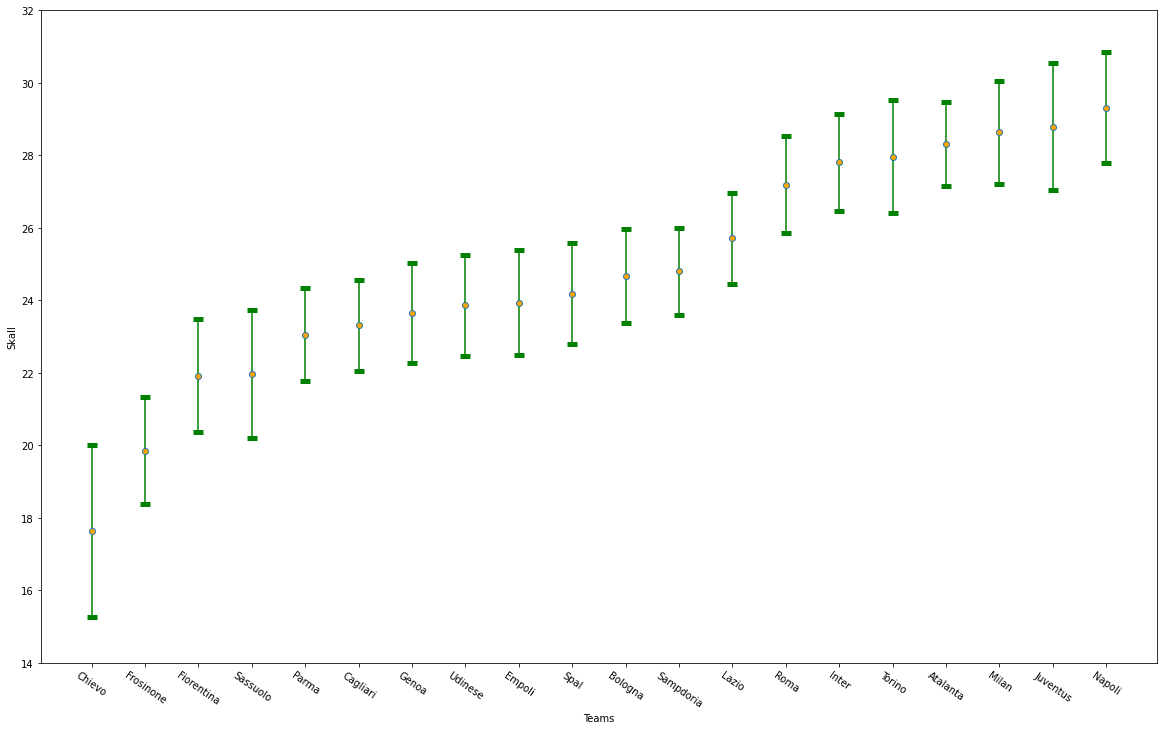

In [48]:
plt.rcParams["figure.figsize"] = (20,12)
#bp = plt.boxplot(results_pd['pdf_series'], labels=results_pd.index, showfliers=False)
eb = plt.errorbar(results_pd.index,
             results_pd['mean'],
             yerr=np.sqrt(results_pd['var']),
             fmt='o', 
             markerfacecolor='orange',
             ecolor='green',
             capsize=5, 
             capthick=5)

plt.xticks(rotation=-35)
plt.xlabel('Teams')
plt.ylabel('Skall')
plt.ylim((14,32))

#for i, line in enumerate(eb.lines):
#    print(line.get_xydata())
#    x, y = line.get_xydata()
#    offset_y = 6.3 if y < 27 else -6.3
#    text = f'μ={results_pd.iloc[i]["mean"]:.2f}\n σ={results_pd.iloc[i]["var"]:.2f}'
#    plt.annotate(text, xy=(x - 0.6, y + offset_y))
plt.show()

Here we can see the final results of the teams' skill levels, sorted in ascending order. We can interpret the variance as how sure we are of a teams' skill. If a teams' win/loss ratio is about 1:1 for a given mean skill level, we are fairly sure of that teams' skill level and the variance shrinks. 
<br>
<br>
If a team with low skill score wins against a team with high skill score, the former's mean and variance will increase and decrease respectively. This is because the team with low skill score is expected to perform better in future matches with higher confidence. Meanwhile, the latter's mean and variance both will decrease; the team with high skill score is expected to perform slightly worse in future matches with higher confidence, relative to their former mean. 

In [49]:
no_ties_df[(no_ties_df["team1"] == "Chievo")  | (no_ties_df["team2"] == "Chievo")]

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1
15,2018-08-26,20:30,Fiorentina,Chievo,6,1,1
45,2018-09-23,15:00,Chievo,Udinese,0,2,-1
54,2018-09-26,21:00,Genoa,Chievo,2,0,1
65,2018-09-30,15:00,Chievo,Torino,0,1,-1
74,2018-10-07,15:00,Milan,Chievo,3,1,1
84,2018-10-21,15:00,Chievo,Atalanta,1,5,-1
95,2018-10-28,15:00,Cagliari,Chievo,2,1,1
107,2018-11-04,15:00,Chievo,Sassuolo,0,2,-1
171,2018-12-26,15:00,Sampdoria,Chievo,2,0,1


In [50]:
no_ties_df[(no_ties_df["team1"] == "Chievo") & (no_ties_df['result'] == 1)  | (no_ties_df["team2"] == "Chievo") & (no_ties_df['result'] == -1)]

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
187,2018-12-29,15:00,Chievo,Frosinone,1,0,1
322,2019-04-20,15:00,Lazio,Chievo,1,2,-1


In [51]:
no_ties_df[(no_ties_df["team1"] == "Sampdoria") & (no_ties_df['result'] == 1)  | (no_ties_df["team2"] == "Sampdoria") & (no_ties_df['result'] == -1)]

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
24,2018-09-02,20:30,Sampdoria,Napoli,3,0,1
30,2018-09-15,20:30,Frosinone,Sampdoria,0,5,-1
68,2018-10-01,20:30,Sampdoria,Spal,2,1,1
76,2018-10-07,15:00,Atalanta,Sampdoria,0,1,-1
132,2018-12-01,20:30,Sampdoria,Bologna,4,1,1
153,2018-12-16,15:00,Sampdoria,Parma,2,0,1
166,2018-12-22,15:00,Empoli,Sampdoria,2,4,-1
171,2018-12-26,15:00,Sampdoria,Chievo,2,0,1
201,2019-01-26,18:00,Sampdoria,Udinese,4,0,1
243,2019-02-24,12:30,Sampdoria,Cagliari,1,0,1


In [52]:
no_ties_df[(no_ties_df["team1"] == "Sampdoria") & (no_ties_df['result'] == -1)  | (no_ties_df["team2"] == "Sampdoria") & (no_ties_df['result'] == 1)]

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
11,2018-08-26,20:30,Udinese,Sampdoria,1,0,1
42,2018-09-22,20:30,Sampdoria,Inter,0,1,-1
96,2018-10-28,18:00,Milan,Sampdoria,3,2,1
105,2018-11-04,15:00,Sampdoria,Torino,1,4,-1
115,2018-11-11,15:00,Roma,Sampdoria,4,1,1
180,2018-12-29,12:30,Juventus,Sampdoria,2,1,1
211,2019-02-02,18:00,Napoli,Sampdoria,3,0,1
226,2019-02-10,15:00,Sampdoria,Frosinone,0,1,-1
237,2019-02-17,18:00,Inter,Sampdoria,2,1,1
263,2019-03-10,15:00,Sampdoria,Atalanta,1,2,-1


## Shuffle Data set and rerun

In [53]:
teams_dict = reset_teams_dict(no_ties_df)

In [54]:
shuffled_df = no_ties_df.sample(frac = 1) 
shuffled_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result
131,2018-12-01,18:00,Fiorentina,Juventus,0,3,-1
179,2018-12-26,20:30,Inter,Napoli,1,0,1
66,2018-09-30,18:00,Parma,Empoli,1,0,1
100,2018-11-02,20:30,Napoli,Empoli,5,1,1
188,2018-12-29,18:00,Napoli,Bologna,3,2,1


In [55]:
teams_dict_updated = ADF(shuffled_df, teams_dict)
    

----------
Fiorentina: (25.00, 69.44 ), Juventus: (25.00, 69.44 )
expected_winner: Juventus, actual winner: Juventus
Fiorentina: (20.83, 48.31 ), Juventus: (29.40, 50.10 )
----------
----------
Inter: (25.00, 69.44 ), Napoli: (25.00, 69.44 )
expected_winner: Napoli, actual winner: Inter
Inter: (28.59, 47.73 ), Napoli: (20.90, 45.34 )
----------
----------
Parma: (25.00, 69.44 ), Empoli: (25.00, 69.44 )
expected_winner: Empoli, actual winner: Parma
Parma: (28.99, 50.64 ), Empoli: (20.27, 51.44 )
----------
----------
Napoli: (20.90, 45.34 ), Empoli: (20.27, 51.44 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (24.11, 36.62 ), Empoli: (16.37, 38.74 )
----------
----------
Napoli: (24.11, 36.62 ), Bologna: (25.00, 69.44 )
expected_winner: Bologna, actual winner: Napoli
Napoli: (27.10, 29.87 ), Bologna: (20.01, 45.45 )
----------
----------
Torino: (25.00, 69.44 ), Lazio: (25.00, 69.44 )
expected_winner: Lazio, actual winner: Torino
Torino: (29.41, 50.76 ), Lazio: (20.55, 51.99 )

Fiorentina: (17.02, 12.13 ), Chievo: (12.97, 14.63 )
----------
----------
Udinese: (18.88, 23.64 ), Juventus: (32.79, 16.81 )
expected_winner: Juventus, actual winner: Juventus
Udinese: (18.77, 22.22 ), Juventus: (32.68, 15.40 )
----------
----------
Udinese: (18.77, 22.22 ), Napoli: (33.87, 16.96 )
expected_winner: Napoli, actual winner: Napoli
Udinese: (18.60, 21.12 ), Napoli: (34.02, 16.69 )
----------
----------
Chievo: (12.97, 14.63 ), Spal: (23.34, 13.45 )
expected_winner: Spal, actual winner: Spal
Chievo: (12.49, 15.23 ), Spal: (23.38, 13.00 )
----------
----------
Napoli: (34.02, 16.69 ), Frosinone: (17.59, 18.53 )
expected_winner: Napoli, actual winner: Napoli
Napoli: (34.02, 16.84 ), Frosinone: (17.62, 19.07 )
----------
----------
Bologna: (25.55, 14.57 ), Parma: (19.22, 16.08 )
expected_winner: Bologna, actual winner: Bologna
Bologna: (26.00, 12.30 ), Parma: (18.55, 13.96 )
----------
----------
Juventus: (32.68, 15.40 ), Bologna: (26.00, 12.30 )
expected_winner: Juventus,

Napoli: (30.94, 10.40 ), Milan: (26.58, 5.76 )
----------
----------
Cagliari: (20.59, 9.76 ), Atalanta: (29.41, 9.74 )
expected_winner: Atalanta, actual winner: Atalanta
Cagliari: (20.27, 9.24 ), Atalanta: (29.54, 8.30 )
----------
----------
Cagliari: (20.27, 9.24 ), Lazio: (19.85, 9.10 )
expected_winner: Cagliari, actual winner: Lazio
Cagliari: (19.01, 7.03 ), Lazio: (21.21, 7.61 )
----------
----------
Lazio: (21.21, 7.61 ), Chievo: (11.94, 13.18 )
expected_winner: Lazio, actual winner: Chievo
Lazio: (19.01, 6.27 ), Chievo: (16.02, 9.07 )
----------
----------
Fiorentina: (23.09, 6.68 ), Atalanta: (29.54, 8.30 )
expected_winner: Atalanta, actual winner: Fiorentina
Fiorentina: (25.13, 5.28 ), Atalanta: (27.20, 6.65 )
----------
----------
Milan: (26.58, 5.76 ), Empoli: (22.27, 8.03 )
expected_winner: Milan, actual winner: Milan
Milan: (27.07, 5.17 ), Empoli: (21.70, 7.23 )
----------
----------
Chievo: (16.02, 9.07 ), Juventus: (28.51, 8.09 )
expected_winner: Juventus, actual winner

Napoli: (28.62, 6.92 ), Fiorentina: (23.88, 4.30 )
----------
----------
Udinese: (22.29, 3.52 ), Empoli: (21.07, 5.90 )
expected_winner: Udinese, actual winner: Udinese
Udinese: (22.74, 3.39 ), Empoli: (20.24, 5.12 )
----------
----------
Udinese: (22.74, 3.39 ), Atalanta: (26.24, 3.34 )
expected_winner: Atalanta, actual winner: Atalanta
Udinese: (22.51, 3.25 ), Atalanta: (26.50, 2.95 )
----------
----------
Frosinone: (19.80, 5.53 ), Torino: (28.59, 5.68 )
expected_winner: Torino, actual winner: Torino
Frosinone: (19.59, 5.23 ), Torino: (28.70, 5.46 )
----------
----------
Inter: (28.18, 6.40 ), Cagliari: (21.10, 3.12 )
expected_winner: Inter, actual winner: Inter
Inter: (28.58, 5.53 ), Cagliari: (21.00, 3.11 )
----------
----------
Parma: (23.60, 5.41 ), Inter: (28.58, 5.53 )
expected_winner: Inter, actual winner: Inter
Parma: (23.32, 5.19 ), Inter: (29.00, 4.87 )
----------
----------
Lazio: (23.73, 3.28 ), Spal: (19.77, 4.47 )
expected_winner: Lazio, actual winner: Lazio
Lazio: (2

Sassuolo: (22.50, 5.28 ), Cagliari: (21.90, 2.40 )
----------
----------
Roma: (28.82, 3.91 ), Sassuolo: (22.50, 5.28 )
expected_winner: Roma, actual winner: Roma
Roma: (29.02, 3.64 ), Sassuolo: (22.46, 4.92 )
----------
----------
Udinese: (22.89, 2.85 ), Milan: (28.29, 4.11 )
expected_winner: Milan, actual winner: Milan
Udinese: (22.77, 2.85 ), Milan: (28.55, 4.13 )
----------
----------
Inter: (27.37, 2.84 ), Parma: (23.40, 2.29 )
expected_winner: Inter, actual winner: Parma
Inter: (26.50, 2.67 ), Parma: (24.10, 2.12 )
----------
----------
Atalanta: (26.36, 2.35 ), Napoli: (27.73, 3.91 )
expected_winner: Napoli, actual winner: Napoli
Atalanta: (26.08, 2.13 ), Napoli: (28.16, 3.41 )
----------
----------
Inter: (26.50, 2.67 ), Spal: (21.24, 3.24 )
expected_winner: Inter, actual winner: Inter
Inter: (26.60, 2.53 ), Spal: (21.02, 3.00 )
----------
----------
Frosinone: (19.09, 4.41 ), Parma: (24.10, 2.12 )
expected_winner: Parma, actual winner: Frosinone
Frosinone: (20.51, 3.90 ), Par

Lazio: (25.17, 1.92 ), Napoli: (27.86, 2.48 )
----------
----------
Sassuolo: (23.48, 2.96 ), Milan: (27.79, 3.41 )
expected_winner: Milan, actual winner: Milan
Sassuolo: (23.34, 2.92 ), Milan: (28.09, 3.23 )
----------
----------
Bologna: (23.31, 1.87 ), Atalanta: (26.56, 2.02 )
expected_winner: Atalanta, actual winner: Atalanta
Bologna: (23.15, 1.88 ), Atalanta: (26.73, 2.02 )
----------
----------
Spal: (23.87, 2.12 ), Napoli: (27.86, 2.48 )
expected_winner: Napoli, actual winner: Napoli
Spal: (23.63, 2.05 ), Napoli: (28.00, 2.42 )
----------
----------
Cagliari: (22.70, 1.90 ), Udinese: (22.85, 2.89 )
expected_winner: Udinese, actual winner: Udinese
Cagliari: (22.29, 1.69 ), Udinese: (23.34, 2.66 )
----------
----------
Napoli: (28.00, 2.42 ), Juventus: (30.45, 2.68 )
expected_winner: Juventus, actual winner: Juventus
Napoli: (27.74, 2.27 ), Juventus: (30.77, 2.35 )
----------
----------
Bologna: (23.15, 1.88 ), Inter: (26.40, 2.03 )
expected_winner: Inter, actual winner: Inter
Bol

In [56]:
results_pd = pd.DataFrame.from_dict(teams_dict_updated, orient='index', columns=["mean", "var"]).sort_values('mean')


In [57]:
results_pd

,mean,var
Chievo,14.641822,5.182664
Frosinone,20.517079,2.620958
Genoa,21.867833,1.861268
Cagliari,22.290448,1.687373
Fiorentina,22.482122,2.170069
Empoli,22.617688,1.614100
Parma,22.820598,1.641697
Spal,23.091361,1.461763
Udinese,23.435104,2.197871
Bologna,23.989723,1.451913


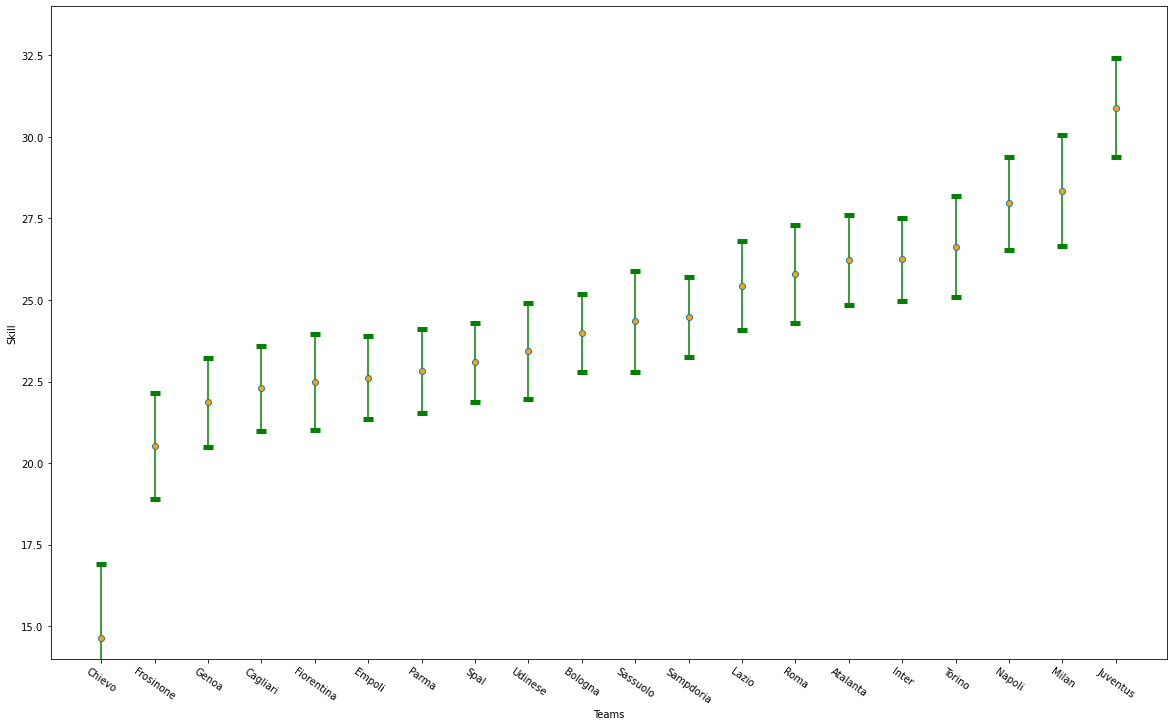

In [58]:
plt.rcParams["figure.figsize"] = (20,12)
eb = plt.errorbar(results_pd.index,
             results_pd['mean'],
             yerr=np.sqrt(results_pd['var']),
             fmt='o', 
             markerfacecolor='orange',
             ecolor='green',
             capsize=5, 
             capthick=5)

plt.xticks(rotation=-35)
plt.xlabel('Teams')
plt.ylabel('Skill')
plt.ylim((14,34))
plt.show()

The outcome varies depending on the order of the matches. Example: If Chievo wins against Lazio in the first match, this will have a much smaller effect on Chievo's estimated skill distribution (since it is very likely in the beginning that Chievo will win) compared to if Chievo wins against Lazio as the last game of the series, where the same outcome is very unlikely according to the posterior belief. 

# Q6

In [59]:
teams_dict = reset_teams_dict(no_ties_df)
teams_dict

{'Chievo': (25, 69.44444444444446),
 'Juventus': (25, 69.44444444444446),
 'Lazio': (25, 69.44444444444446),
 'Napoli': (25, 69.44444444444446),
 'Torino': (25, 69.44444444444446),
 'Roma': (25, 69.44444444444446),
 'Sassuolo': (25, 69.44444444444446),
 'Inter': (25, 69.44444444444446),
 'Empoli': (25, 69.44444444444446),
 'Cagliari': (25, 69.44444444444446),
 'Bologna': (25, 69.44444444444446),
 'Spal': (25, 69.44444444444446),
 'Atalanta': (25, 69.44444444444446),
 'Frosinone': (25, 69.44444444444446),
 'Milan': (25, 69.44444444444446),
 'Parma': (25, 69.44444444444446),
 'Udinese': (25, 69.44444444444446),
 'Sampdoria': (25, 69.44444444444446),
 'Genoa': (25, 69.44444444444446),
 'Fiorentina': (25, 69.44444444444446)}

In [60]:
predictions_df = no_ties_df
predictions_df["prediction"] = 0

<ipython-input-60-3f51f19973fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions_df["prediction"] = 0


In [61]:
predictions_df.head()

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,result,prediction
0,2018-08-18,18:00,Chievo,Juventus,2,3,-1,0
1,2018-08-18,20:30,Lazio,Napoli,1,2,-1,0
2,2018-08-19,18:00,Torino,Roma,0,1,-1,0
3,2018-08-19,20:30,Sassuolo,Inter,1,0,1,0
5,2018-08-19,20:30,Empoli,Cagliari,2,0,1,0


In [62]:
def predict_y(s1, s2):
    if s1 > s2:
        return 1
    return -1

In [63]:
for i, row in predictions_df.iterrows():
    team_1 = row['team1']
    team_2 = row['team2']
    predictions_df.at[i, 'prediction'] = predict_y(teams_dict[team_1][0], teams_dict[team_2][0])

    new_mu, new_cov = gibbs_sample_one_game(teams_dict[team_1][0], 
                                            teams_dict[team_1][1],
                                            teams_dict[team_2][0], 
                                            teams_dict[team_2][1],
                                            row['result'], 
                                            1000)

    teams_dict[team_1] = (new_mu[0], new_cov[0, 0])
    teams_dict[team_2] = (new_mu[1], new_cov[1, 1])

In [64]:
correct_predictions = predictions_df[predictions_df['prediction'] == predictions_df['result']]

In [65]:
len(correct_predictions)/len(predictions_df)

0.6544117647058824

## Q.8

# Data generation methods

In [66]:
def gen_list_names(df):
    ## Implied that every team plays at least 1 home game in the data set
    return df["team1"].unique()

def gen_dict(name_list):
    return dict.fromkeys(name_list, (25, pow(25/3, 2)))

def gen_df_from_dict(dictionary):
    results_pd = pd.DataFrame.from_dict(dictionary, orient='index', columns=["mean", "var"])
    return results_pd


In [67]:
def init_data():
    df = pd.read_csv("SerieA.csv")
    # df.info()
    no_ties_df = df.loc[df["score1"] != df["score2"]]
    # no_ties_df.info()
    init_dict = gen_dict(gen_list_names(no_ties_df))
    return no_ties_df, init_dict

# Random variables
### s1 ~ N(m_s1, sigma_s1^2)
### s2 ~ N(m_s2, sigma_s2^2)
### t = N(s1 - s2, sigma_t²2)
### y = sign(t)

# Factors
### factor_s1 = N(s1; m_s1, sigma_s1^2)
### factor_s2 = N(s2; m_s2, sigma_s2^2)
### factor_s1s2t(s1,s2,t) = N(t; s1-s2, sigma_t^2)
### factor_ty(t, y) = dirac(y= sign(t))

# Gaussian cheat sheet methods
## Copied from ex. 7.1

In [68]:
def multiplyGauss(m1,s1,m2,s2):
    # computes the Gaussian dist N(m,s) proportional to N(m1,s1)*N(m2,s2)
    s = 1/(1/s1 + 1/s2)
    m = (m1/s1 + m2/s2)*s
    return m,s

def divideGauss(m1, s1, m2, s2):
    # computes the Gaussian dist N(m,s) proportional to N(m1,s1)/N(m2,s2)
    return multiplyGauss(m1,s1,m2,-s2)

def truncGaussMM(a,b, m0, s0):
    # a and b are scaled intervals with the mean and variance, see moment_matching()
    return truncnorm.mean(a, b, loc=m0, scale=np.sqrt(s0)), truncnorm.var(a, b, loc=m0, scale=np.sqrt(s0))

# def moment_matching(y, goal_diff, message_m, message_s):
def moment_matching(y, message_m, message_s):
    if y == 1:
        a, b = (0 - message_m)/np.sqrt(message_s), np.inf  
    # a, b = (0 - message_m - 7*(goal_diff-1))/np.sqrt(message_s), np.inf
    else:
        # a, b = -np.inf, (0 - message_m - 10*(goal_diff-1))/np.sqrt(message_s)
        a, b = -np.inf, (0 - message_m)/np.sqrt(message_s)
    return truncGaussMM(a, b, message_m, message_s)


# Message passing algorithm

In [69]:
# Message passing algorithm
import random as rd

def message_pass_no_loop(y, skill_dict, var_t):
    goal_diff = 1

    print('*' * 10)
    print("prior dist s1 s2")
    print("mu1, var1", skill_dict["team1"][0], skill_dict["team1"][1])
    print("mu2, var2", skill_dict["team2"][0], skill_dict["team2"][1])

    ## Message from S1 -> fs1s2t == prior
    mu1_m = skill_dict["team1"][0]
    mu1_s = skill_dict["team1"][1]

    ## Message from S2 -> fs1s2t == prior
    mu2_m = skill_dict["team2"][0]
    mu2_s = skill_dict["team2"][1]

    ## Message from fs1s2t -> t integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s1, s2
    mu3_m = mu1_m - mu2_m
    mu3_s = mu1_s + mu2_s + var_t

    ## Moment matching on y, since fty results in a truncated norm, approximate the message with a gaussian distribution
    pt_m, pt_s = moment_matching(y, mu3_m, mu3_s)
        
    print('*'*10)
    print("moment matching pt_m, pt_s", pt_m, pt_s)
        
    ## Compute the marginals of s1, s2 (the message from f_s1s2t to s1,s2)
    # Compute the message from t|y to f_s1s2t by dividing q(t)/mu_3(t)
    mu4_m, mu4_s = divideGauss(pt_m, pt_s, mu3_m, mu3_s)
        
    ## Message from fs1s2t -> s1 integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s1, t
    mu5_m, mu5_s = mu4_m + mu2_m, var_t + mu4_s + mu2_s
    ## Multiply m1 and mu5 to compute the posterior of s1
    posts1_m, posts1_s = multiplyGauss(mu5_m, mu5_s, mu1_m, mu1_s)
        
    ## Message from fs1s2t -> s2 integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s2, t
    mu6_m, mu6_s = mu1_m - mu4_m, var_t + mu4_s + mu1_s
    ## Multiply mu2 and mu6 to compute the posterior of s2
    posts2_m, posts2_s = multiplyGauss(mu6_m, mu6_s, mu2_m, mu2_s)
        
                
    print('*' * 10)
    print("posterior dist s1 s2")
    print("mu1, var1", posts1_m, posts1_s)
    print("mu2, var2", posts2_m, posts2_s)
    
    ## Update dictionary
    skill_dict["team1"] = (posts1_m, posts1_s)
    skill_dict["team2"] = (posts2_m, posts2_s)
        
    return skill_dict


In [70]:
# Initial values from Q.4

mu_1 = 0
mu_2 = 0
var_1 = 1
var_2 = 1
var_t = 1
y = 1

In [71]:
def __main():
    skill_dict = {"team1": (mu_1, var_1), "team2": (mu_2, var_2)}
    skill_dict_post = message_pass_no_loop(y, skill_dict, var_t)
    return skill_dict_post

updated_dict = __main()

**********
prior dist s1 s2
mu1, var1 0 1
mu2, var2 0 1
**********
moment matching pt_m, pt_s 1.381976597885342 1.0901406828972557
**********
posterior dist s1 s2
mu1, var1 0.4606588659617806 0.7877934092108061
mu2, var2 -0.4606588659617806 0.7877934092108061


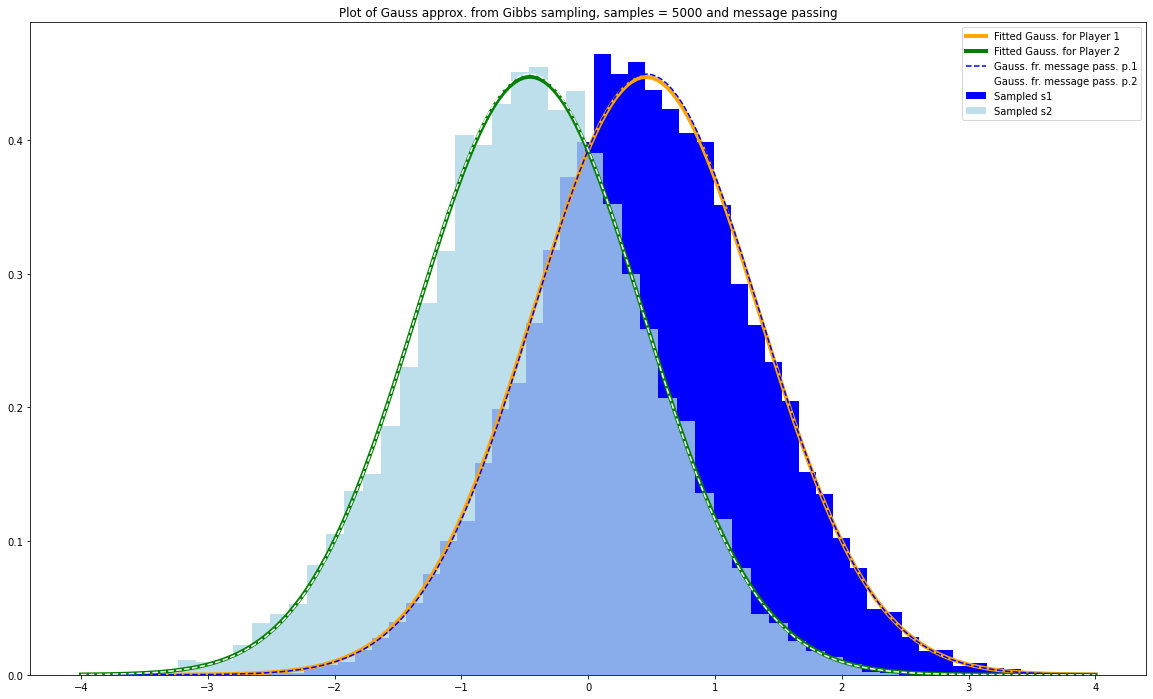

In [72]:
plt.plot(xv ,normal_pdf(xv, est_mean[0], est_cov[0, 0]), label="Fitted Gauss. for Player 1", color="orange", linewidth=4)
plt.hist(S1, density=True, bins=50, label="Sampled s1", color="blue")
plt.plot(xv ,normal_pdf(xv, est_mean[1], est_cov[1, 1]), label="Fitted Gauss. for Player 2", color="green", linewidth=4)
plt.hist(S2, density=True, bins=50, label="Sampled s2", color="lightblue", alpha=0.8)
plt.plot(xv, normal_pdf(xv, updated_dict["team1"][0], updated_dict["team1"][1]), 'b--', label="Gauss. fr. message pass. p.1")
plt.plot(xv, normal_pdf(xv, updated_dict["team2"][0], updated_dict["team2"][1]), 'w--', label="Gauss. fr. message pass. p.2")
plt.legend(loc="best")
plt.title("Plot of Gauss approx. from Gibbs sampling, samples = 5000 and message passing")
plt.savefig("q8plot.png")
plt.show()


# Q.9 New dataset

In [73]:
def gen_list_id(df):
    ## Implied that every team plays at least 1 home game in the data set
    return df["rikishi1_id"].unique()

def gen_dict(name_list):
    return dict.fromkeys(name_list, (10, pow(10/3, 2)))

def gen_df_from_dict(dictionary):
    results_pd = pd.DataFrame.from_dict(dictionary, orient='index', columns=["mean", "var"])
    return results_pd

In [74]:
# Message passing algorithm
import random as rd
def message_pass_sumo(df, sumo_dict):
    count_accurate = 0
    for i, row in df.iterrows():
        if row['rikishi1_win'] == 1:
            y = 1
        else:
            y = -1

        sumo1_prior_mu = sumo_dict[row['rikishi1_id']][0]
        sumo1_prior_s = sumo_dict[row['rikishi1_id']][1]
        sumo2_prior_mu = sumo_dict[row['rikishi2_id']][0]
        sumo2_prior_s = sumo_dict[row['rikishi2_id']][1]
        
        if sumo1_prior_mu - sumo2_prior_mu > 0:
            expected_winner = row['rikishi1_id']
        elif sumo1_prior_mu == sumo2_prior_mu:
            expected_winner = row['rikishi1_id'] if rd.random() > 0.5 else row['rikishi2_id']
        else:
            expected_winner = row['rikishi2_id']
        actual_winner = row['rikishi1_id'] if y == 1 else row['rikishi2_id']
        
        count_accurate += 1 if expected_winner == actual_winner else 0
        
        ## Message from S1 -> fs1s2t
        mu1_m = sumo1_prior_mu
        mu1_s = sumo1_prior_s

        ## Message from S2 -> fs1s2t
        mu2_m = sumo2_prior_mu
        mu2_s = sumo2_prior_s

        ## Message from fs1s2t -> t integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s1, s2
        s_t = pow(25/6, 2)
        mu3_m = mu1_m - mu2_m
        mu3_s = mu1_s + mu2_s + s_t

        ## Moment matching on y, since fty results in a truncated norm, approximate the message with a gaussian distribution
        pt_m, pt_s = moment_matching(y, mu3_m, mu3_s)
        
        ## Compute the marginals of s1, s2 (the message from f_s1s2t to s1,s2)
        # Compute the message from t|y to f_s1s2t by dividing q(t)/mu_3(t)
        mu4_m, mu4_s = divideGauss(pt_m, pt_s, mu3_m, mu3_s)
        
        ## Message from fs1s2t -> s1 integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s1, t
        mu5_m, mu5_s = mu4_m + mu2_m, s_t + mu4_s + mu2_s
        ## Multiply m1 and mu5 to compute the posterior of s1
        posts1_m, posts1_s = multiplyGauss(mu5_m, mu5_s, mu1_m, mu1_s)
        
        ## Message from fs1s2t -> s2 integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s2, t
        mu6_m, mu6_s = mu1_m - mu4_m, s_t + mu4_s + mu1_s
        ## Multiply mu2 and mu6 to compute the posterior of s1
        posts2_m, posts2_s = multiplyGauss(mu6_m, mu6_s, mu2_m, mu2_s)
        
        
        ## Update s1 and s2
        sumo_dict[row['rikishi1_id']] = posts1_m, posts1_s
        sumo_dict[row['rikishi2_id']] = posts2_m, posts2_s
        
        
    return sumo_dict, count_accurate


In [75]:
df1 = pd.read_csv("sumo_results_2018.csv")
df2 = pd.read_csv("sumo_results_2019.csv")
df_joined = pd.concat([df1, df2])
id_list = gen_list_id(df_joined)
sumo_df = df_joined.iloc[::2, :]

sumo_dict = gen_dict(id_list)
updated_dict, accurate_preds = message_pass_sumo(sumo_df, sumo_dict)
ratio_accurate = accurate_preds / len(sumo_df)
print(ratio_accurate)
updated_df = gen_df_from_dict(updated_dict)
updated_df.sort_values('mean')
# sumo_df.head()


0.5488844549247234


,mean,var
11989,5.554841,2.473413
11987,6.117625,3.599368
11927,6.217275,1.086173
11972,6.586773,1.295109
11918,6.839646,1.066256
...,...,...
6468,12.740629,0.197144
12191,12.799434,0.215218
6480,13.632134,0.245011
1219,14.179140,0.275860


# Q.10 extension

In [76]:
# Message passing algorithm for Serie A dataset
import random as rd

def message_pass(df, draw_prob, hta_prob, team_dict):
#def message_pass(df, team_dict):
    count_accurate = 0
    count_predicted_ties = 0
    for i, row in df.iterrows():
        
        s_t = pow(25/6, 2)
        # draw_margin = 0.05
        draw_margin = np.sqrt(2)*(1/s_t)*norm.ppf((1 + draw_prob)/2)
        hta_margin = np.sqrt(2)*(1/s_t)*norm.ppf((1 + hta_prob)/2)
        # hta_margin = 0
        
        
        if row['score1'] > row['score2']:
             y = 1
        elif row['score1'] == row['score2']:
             y = 0
        else:
             y = -1
        
        # Team 1 has home team advantage
        # team1_prior_mu = team_dict[row['team1']][0] + hta_margin
        team1_prior_mu = team_dict[row['team1']][0]
        team1_prior_s = team_dict[row['team1']][1]
        team1_has_consec_wins = team_dict[row['team1']][2]
        team2_prior_mu = team_dict[row['team2']][0]
        team2_prior_s = team_dict[row['team2']][1]
        team2_has_consec_wins = team_dict[row['team2']][2]
        
        # Implementation of consec wins advantage
        
        # if team2_has_consec_wins > 0:
        #    team1_prior_mu += np.sqrt(2)*(1/s_t)*norm.ppf((1 + 0.2*team1_has_consec_wins)/2)
        # if team2_has_consec_wins > 0:
         #   team2_prior_mu += np.sqrt(2)*(1/s_t)*norm.ppf((1 + 0.2*team1_has_consec_wins)/2)
        
        
        # IMPLEMENTATION OF RANDOM VARIABLE SAMPLING FROM VARIANCE
         # random_perf_modifier_s1 = norm.rvs(0, np.sqrt(team1_prior_s))
         # random_perf_modifier_s2 = norm.rvs(0, np.sqrt(team2_prior_s))
        random_perf_modifier_s1 = 0
        random_perf_modifier_s2 = 0
         # print("variance s1, perf modifier s1: ", team1_prior_s, random_perf_modifier_s1)
         # print("variance s2, perf modifier s2: ", team2_prior_s, random_perf_modifier_s2)
         # print("team 1 old mu, team 1 new mu", team1_prior_mu, team1_prior_mu + random_perf_modifier_s1)
         # print("team 2 old mu, team 2 new mu", team2_prior_mu, team2_prior_mu + random_perf_modifier_s2)
        
        
        if team2_prior_mu + random_perf_modifier_s2 < team1_prior_mu + hta_margin + random_perf_modifier_s1:
            expected_winner = row['team1']
        elif np.abs(team1_prior_mu - team2_prior_mu) < draw_margin: 
            expected_winner = 0
            count_predicted_ties += 1
            print(count_predicted_ties)
        else:
            expected_winner = row['team2']
        
        if y == 1:
            actual_winner = row['team1']
            team1_has_consec_wins += 1
            team2_has_consec_wins = 0
        elif y == 0:
            actual_winner = 0
            team1_has_consec_wins = 0
            team2_has_consec_wins = 0
        else:
            actual_winner = row['team2']
            team2_has_consec_wins += 1
            team1_has_consec_wins = 0
        
        
        count_accurate += 1 if expected_winner == actual_winner else 0
        # print('*'*10)
        # print("expected_winner: ", expected_winner)
        # print("actual winner: ", actual_winner)
        # print("team 1 consec wins: ", team1_has_consec_wins)
        # print("team 2 consec wins: ", team2_has_consec_wins)
        # print("accurate predictions count: ", count_accurate)
        
        if y == 0:
            if team1_prior_mu > team2_prior_mu:
                y = -1
            else:
                y = 1
                
        # goal_diff = np.abs(row['score1'] - row['score2'])
        goal_diff = 1

            # print('*' * 10)
            # print("prior dist s1 s2")
            # print(row['team1'], team1_prior_mu, team1_prior_s)
            # print(row['team2'], team2_prior_mu, team2_prior_s)

        ## Message from S1 -> fs1s2t
        mu1_m = team1_prior_mu
        mu1_s = team1_prior_s

        ## Message from S2 -> fs1s2t
        mu2_m = team2_prior_mu
        mu2_s = team2_prior_s

        ## Message from fs1s2t -> t integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s1, s2
        mu3_m = mu1_m - mu2_m
        mu3_s = mu1_s + mu2_s + s_t

        ## Moment matching on y, since fty results in a truncated norm, approximate the message with a gaussian distribution
        # pt_m, pt_s = moment_matching(y, goal_diff, mu3_m, mu3_s)
        pt_m, pt_s = moment_matching(y, mu3_m, mu3_s)
        
            # print('*'*10)
            # print("moment matching pt_m, pt_s", pt_m, pt_s)
        
        ## Compute the marginals of s1, s2 (the message from f_s1s2t to s1,s2)
        # Compute the message from t|y to f_s1s2t by dividing q(t)/mu_3(t)
        mu4_m, mu4_s = divideGauss(pt_m, pt_s, mu3_m, mu3_s)
        
        ## Message from fs1s2t -> s1 integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s1, t
        mu5_m, mu5_s = mu4_m + mu2_m, s_t + mu4_s + mu2_s
        ## Multiply m1 and mu5 to compute the posterior of s1
        posts1_m, posts1_s = multiplyGauss(mu5_m, mu5_s, mu1_m, mu1_s)
        
        ## Message from fs1s2t -> s2 integrate fxt(t, s1, s2)* p(s1,s2) to eliminate s2, t
        mu6_m, mu6_s = mu1_m - mu4_m, s_t + mu4_s + mu1_s
        ## Multiply mu2 and mu6 to compute the posterior of s1
        posts2_m, posts2_s = multiplyGauss(mu6_m, mu6_s, mu2_m, mu2_s)
        
        
        ## Update s1 and s2
        team_dict[row['team1']] = posts1_m, posts1_s, team1_has_consec_wins
        team_dict[row['team2']] = posts2_m, posts2_s, team2_has_consec_wins
        
            # print('*' * 10)
            # print("posterior dist s1 s2")
            # print(row['team1'], mu7_m, mu7_s)
            # print(row['team2'], mu8_m, mu8_s)
        
    return team_dict, count_accurate


In [77]:
def gen_list_names(df):
    ## Implied that every team plays at least 1 home game in the data set
    return df["team1"].unique()

def gen_dict(name_list):
    ## Inital mean, variance and consecutive wins for each team
    return dict.fromkeys(name_list, (25, pow(25/3, 2), 0))

def gen_df_from_dict(dictionary):
    results_pd = pd.DataFrame.from_dict(dictionary, orient='index', columns=["mean", "var", "final_consec"])
    return results_pd

In [78]:
def init_data():
    df = pd.read_csv("SerieA.csv")
    no_ties_df = df.loc[df["score1"] != df["score2"]]
    init_dict = gen_dict(gen_list_names(df))
    return df, init_dict

In [79]:
def __main():
    df, teams_dict = init_data()
    win_df = df[df["score1"] > df["score2"]]
    hta_emp = len(win_df) / len(df)
    draw_prob_emp = 0.284211
    updated_dict, accurate_preds = message_pass(df, draw_prob_emp, hta_emp, teams_dict)
    ratio_accurate = accurate_preds / len(df)
    print(ratio_accurate)
    updated_df = gen_df_from_dict(updated_dict)
    return updated_df

updated_df = __main()
updated_df.sort_values("mean")

0.46578947368421053


,mean,var,final_consec
Chievo,23.364994,1.000490,0
Frosinone,23.529887,1.064492,0
Cagliari,24.047787,1.021555,0
Parma,24.201351,0.947206,0
Fiorentina,24.221409,0.934649,0
Genoa,24.285968,0.958953,0
Sassuolo,24.379560,0.972383,0
Empoli,24.492112,1.066633,0
Spal,24.543511,1.003483,0
Sampdoria,24.588564,0.976866,1
